In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
import folium as g
import json
import warnings
warnings.filterwarnings("ignore")

1. 쓰레기통 현황 시각화

In [12]:
#현황데이터 불러오기
trash=pd.read_csv('데이터/trash.csv',encoding='cp949') 
trash_map=pd.read_csv('데이터/trash_map.csv',encoding='cp949')
trash_sum=pd.read_csv('데이터/trash_sum.csv',encoding='cp949')

In [6]:
trash

,행정동,세부 위치(상세 주소),설치 장소 유형,수거 쓰레기 종류
0,사직동,경복궁역 4번출구,지하철역 입구,일반쓰레기
1,사직동,경복궁역 4번출구,지하철역 입구,재활용
2,사직동,자하문로 28,도로변(횡단보도 포함),일반쓰레기
3,사직동,자하문로 28,도로변(횡단보도 포함),재활용
4,청운효자동,자하문로 44,도로변(횡단보도 포함),일반쓰레기
...,...,...,...,...
194,창신1동,종로300 동일빌딩앞,도로변(횡단보도 포함),일반쓰레기
195,창신2동,종로301 동일빌딩앞,도로변(횡단보도 포함),재활용
196,숭인2동,종로 413(우리은행앞),도로변(횡단보도 포함),일반쓰레기
197,숭인2동,종로 413(우리은행앞),도로변(횡단보도 포함),재활용


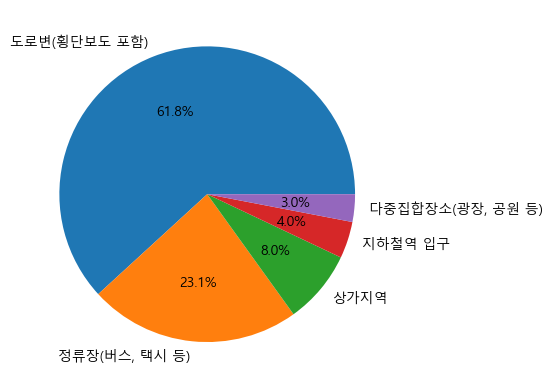

In [3]:
# 설치 장소 유형, 수거 쓰레기 종류, 형태 시각화

trash_place_type=trash['설치 장소 유형'].value_counts().to_frame()
trash_place_type.reset_index(drop=False, inplace=True)

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic' #글씨체 설정해두기 (matplotlib 한글 깨지지 않게)

frequency_key=trash_place_type['설치 장소 유형']
frequency_value=trash_place_type['count']

plt.pie(frequency_value, labels=frequency_key, autopct='%.1f%%')
plt.show()


In [4]:
trash_place_type

,설치 장소 유형,count
0,도로변(횡단보도 포함),123
1,"정류장(버스, 택시 등)",46
2,상가지역,16
3,지하철역 입구,8
4,"다중집합장소(광장, 공원 등)",6


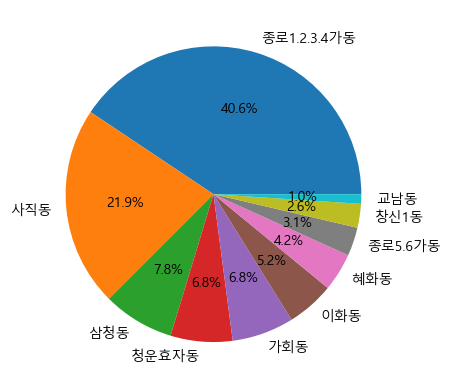

In [9]:
trash_address=trash['행정동'].value_counts().to_frame() #도로명 카운트 데이터 프레임으로 변경
trash_address.reset_index(drop=False, inplace=True)

frequency_key=trash_address['행정동'][:10]
frequency_value=trash_address['count'][:10]

plt.pie(frequency_value, labels=frequency_key, autopct='%.1f%%')
plt.show()


In [10]:
trash_address

,행정동,count
0,종로1.2.3.4가동,78
1,사직동,42
2,삼청동,15
3,청운효자동,13
4,가회동,13
5,이화동,10
6,혜화동,8
7,종로5.6가동,6
8,창신1동,5
9,교남동,2


In [13]:
# 설치현황 지도 시각화

import folium

#지도의 중심을 지정하기 위해 위도와 경도의 평균 구하기
lat= trash_map['x좌표'].mean()
long= trash_map['y좌표'].mean()

#위도 경도
trash_x=trash_map['x좌표']
trash_y=trash_map['y좌표']

#지도 띄우기
m = folium.Map([lat, long], zoom_start = 14)

coords = []
for i in range(len(trash_map)-1):
    x = trash_x[i]
    y = trash_y[i]
    coords.append([x, y])
    
for i in range(len(coords)):
    folium.Circle(
        location = coords[i],
        radius = 50,
        color = '#000000',
        fill = 'crimson',
    ).add_to(m)

m
#m.save('데이터/map.html')
#실행결과 지도에 쓰레기통 위치 표시된 map.html 파일 생성

#지도시각화 참고 사이트
#https://anweh.tistory.com/17 

In [ ]:
#고르게 퍼져있기보다는 특정 지역에 몰려있고, 어떤 도로는 아예 없기도 함

In [14]:
# 설치현황 지도 시각화 2

import folium as g

# 마커
lat= trash_map['x좌표'].mean()
long= trash_map['y좌표'].mean()


jongno_map=g.Map(location=[lat,long],
                 tiles='Stamen Terrain',
                 zoom_start=14)

for i in range(len(trash_map)):
    marker=g.Marker([trash_map.loc[i]['x좌표'],trash_map.loc[i]['y좌표']],
                    icon=g.Icon(color='blue'))
    marker.add_to(jongno_map)
    
    
jongno_map
 
#https://www.sloth-lifes.com/entry/Python-%EC%8B%9C%EA%B0%81%ED%99%94-%EC%82%AC%EC%9A%A9%EB%B2%95-folium-%EC%9D%84-%ED%86%B5%ED%95%9C-%EC%A7%80%EB%8F%84-%EC%8B%9C%EA%B0%81%ED%99%94-%EB%B0%8F-%EB%A7%88%EC%BB%A4marker-%EC%B0%8D%EA%B8%B0


2. 생활인구 데이터 시각화

In [21]:
pop_sum=pd.read_csv('데이터/pop_sum.csv',encoding='cp949')
pop=pd.read_csv('데이터/pop.csv',encoding='cp949')

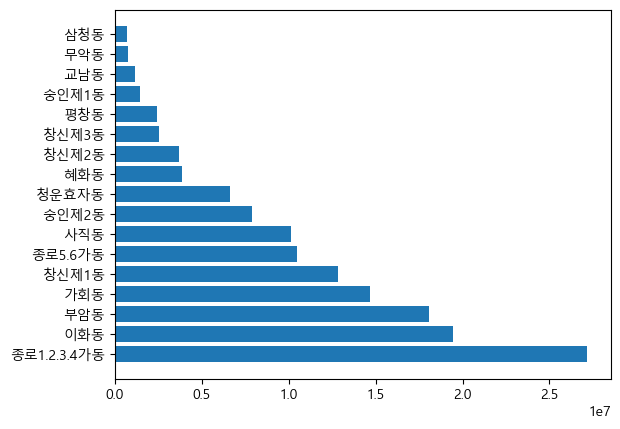

In [20]:
#그래프에 행정동명만 나타내기 위해 행정동에서 행정동명만 추출

#bar 그래프 시각화 
y=pop_sum['총 생활인구 수']
x=pop_sum['행정동']

plt.barh(x,y)
plt.tight_layout
plt.show()

In [26]:
pop_sum

,행정동,총 생활인구 수
0,종로1.2.3.4가동,27171561
1,이화동,19447056
2,부암동,18044324
3,가회동,14668149
4,창신제1동,12862192
5,종로5.6가동,10453626
6,사직동,10147192
7,숭인제2동,7907348
8,청운효자동,6605859
9,혜화동,3855036


In [22]:
#행정동에 따른 생활인구 수 시각화

import json
import folium

df=pop

seoul_geo = json.load(open('데이터/HangJeongDong_ver20230701.geojson',encoding='utf8'))
seoul_geo['features'] = seoul_geo['features'][:17] #종로구만

m_p = folium.Map(location = ['37.5981504', '126.9735539'], zoom_start=13, tiles='CartoDB positron') #중심 좌표
fmap = folium.Choropleth(geo_data = seoul_geo,
                         data = df,
                         columns=['행정동','총_생활인구_수'],
                         key_on='feature.properties.temp',fill_color='PuRd',
                         fill_opacity=0.7, line_opacity=0.3,
                         legend_name = '생활인구수',
                         highlight = True
                        ).add_to(m_p)


m_p

3. 매출 데이터 시각화

In [23]:
sales=pd.read_csv('데이터/sales.csv',encoding='cp949')
sales_sum=pd.read_csv('데이터/sales_sum.csv',encoding='cp949')

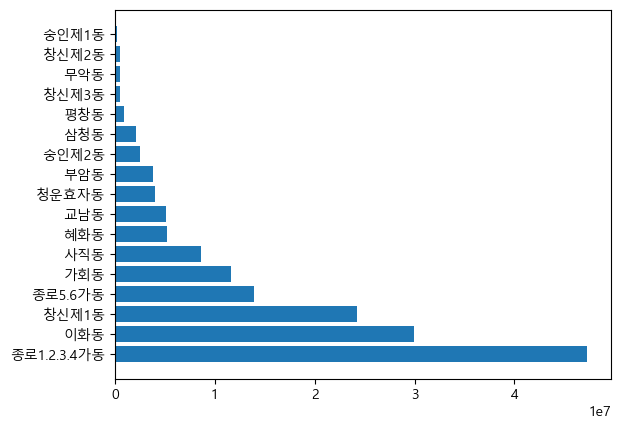

In [24]:
#bar 그래프 시각화 
y=sales_sum['총 매출 건수']
x=sales_sum['행정동']

plt.barh(x,y)
plt.tight_layout
plt.show()

In [25]:
sales_sum

,행정동,총 매출 건수
0,종로1.2.3.4가동,47291024
1,이화동,29944772
2,창신제1동,24263535
3,종로5.6가동,13965285
4,가회동,11673960
5,사직동,8591112
6,혜화동,5270009
7,교남동,5153420
8,청운효자동,4001699
9,부암동,3825932


In [27]:
import json
import folium

df=sales

seoul_geo = json.load(open('데이터/HangJeongDong_ver20230701.geojson',encoding='utf8'))
seoul_geo['features'] = seoul_geo['features'][:17] #종로구만

m_p = folium.Map(location = ['37.5981504', '126.9735539'], zoom_start=13, tiles='CartoDB positron') #중심 좌표
fmap = folium.Choropleth(geo_data = seoul_geo,
                         data = df,
                         columns=['행정동','분기당_매출_건수'],
                         key_on='feature.properties.temp',fill_color='PuRd',
                         fill_opacity=0.7, line_opacity=0.3,
                         legend_name = '매출건수',
                         highlight = True
                        ).add_to(m_p)

m_p

4. 버스 정류소 데이터 시각화

In [30]:
data_bus=pd.read_csv('데이터/data_bus.csv',encoding='cp949')
bus=pd.read_csv('데이터/bus.csv',encoding='cp949')
bus_sum=pd.read_csv('데이터/bus_sum.csv',encoding='cp949')

In [32]:
#버스정류소 위치 지도 시각화

lat= data_bus['x좌표'].mean()
long= data_bus['y좌표'].mean()

#지도의 중심을 지정하기 위해 위도와 경도의 평균 구하기

#위도 경도
bus_x=data_bus['x좌표']
bus_y=data_bus['y좌표']

#지도 띄우기
m = folium.Map([lat,long], zoom_start = 14)

coords = []
for i in range(len(data_bus)-1):
    x = bus_x[i]
    y = bus_y[i]
    coords.append([x, y])
    
for i in range(len(coords)):
    folium.Circle(
        location = coords[i],
        radius = 50,
        color = '#000000',
        fill = 'crimson',
    ).add_to(m)

m

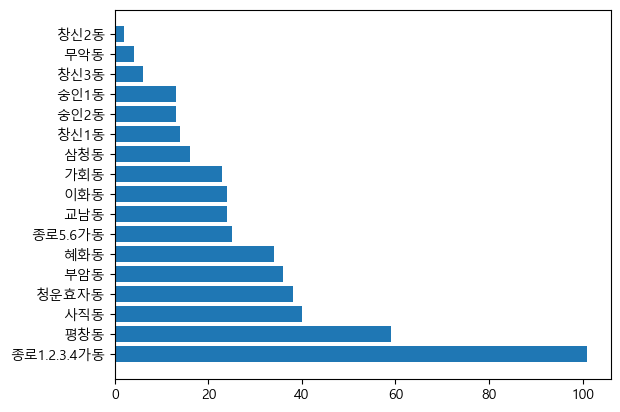

In [34]:
#bar 그래프 시각화 
y=bus_sum['버스정류소 수']
x=bus_sum['행정동']

plt.barh(x,y)
plt.tight_layout
plt.show()

In [35]:
bus_sum

,행정동,버스정류소 수
0,종로1.2.3.4가동,101
1,평창동,59
2,사직동,40
3,청운효자동,38
4,부암동,36
5,혜화동,34
6,종로5.6가동,25
7,교남동,24
8,이화동,24
9,가회동,23


5. 지하철역 위치 데이터 시각화

In [38]:
data_subway=pd.read_csv('데이터/data_subway.csv',encoding='cp949')
subway=pd.read_csv('데이터/subway.csv',encoding='cp949')
subway_sum=pd.read_csv('데이터/subway_sum.csv',encoding='cp949')

In [39]:
#지하철역 데이터 위치 시각화

#지도의 중심을 지정하기 위해 위도와 경도의 평균 구하기
lat= data_subway['위도'].mean()
long= data_subway['경도'].mean()

#위도 경도
subway_x=data_subway['위도']
subway_y=data_subway['경도']

#지도 띄우기
m = folium.Map([lat, long], zoom_start = 14)

coords = []
for i in range(len(subway)-1):
    x = subway_x[i]
    y = subway_y[i]
    coords.append([x, y])
    
for i in range(len(coords)):
    folium.Circle(
        location = coords[i],
        radius = 50,
        color = '#000000',
        fill = 'crimson',
    ).add_to(m)

m
#m.save('데이터/map.html')
#실행결과 지도에 쓰레기통 위치 표시된 map.html 파일 생성


#지도시각화 참고 사이트
#https://anweh.tistory.com/17 

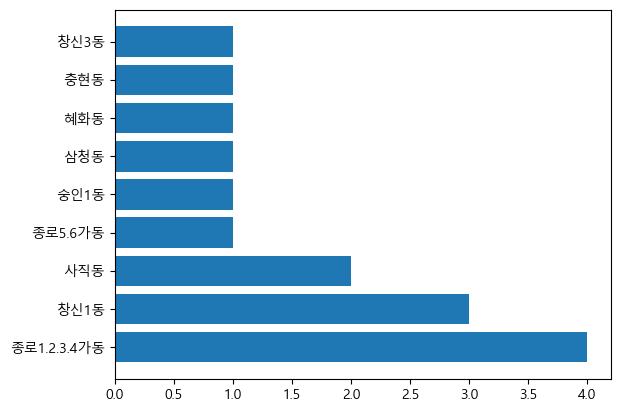

In [41]:
#bar 그래프 시각화 
y=subway_sum['지하철역 수']
x=subway_sum['행정동']

plt.barh(x,y)
plt.tight_layout
plt.show()

In [40]:
subway_sum

,행정동,지하철역 수
0,종로1.2.3.4가동,4
1,창신1동,3
2,사직동,2
3,종로5.6가동,1
4,숭인1동,1
5,삼청동,1
6,혜화동,1
7,충현동,1
8,창신3동,1
